# Linear Regression Training Project: Energy

This study looked into assessing the cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters. Cooling load (Cooling load) is the amount of heat that must be removed from a space to maintain the desired temperature and humidity levels during hot weather. It is measured in units of kW (kilowatts) or Btu/h (British thermal units per hour).

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. 

We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the data

In [79]:
data = pd.read_excel(r"D:\Python\ENB2012_data.xlsx")
data.head()

,Relative Compactness,Surface,Wall Area,Roof Area,Ovr_height,Orientation,Glazing Area,Glazing Area Dist,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Relative Compactness  768 non-null    float64
 1   Surface               768 non-null    float64
 2   Wall Area             768 non-null    float64
 3   Roof Area             768 non-null    float64
 4   Ovr_height            768 non-null    float64
 5   Orientation           768 non-null    int64  
 6   Glazing Area          768 non-null    float64
 7   Glazing Area Dist     768 non-null    int64  
 8   Cooling Load          768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [81]:
data.describe()

,Relative Compactness,Surface,Wall Area,Roof Area,Ovr_height,Orientation,Glazing Area,Glazing Area Dist,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,48.030000


### Exploratory Data Analysis

Tìm question đi ae 

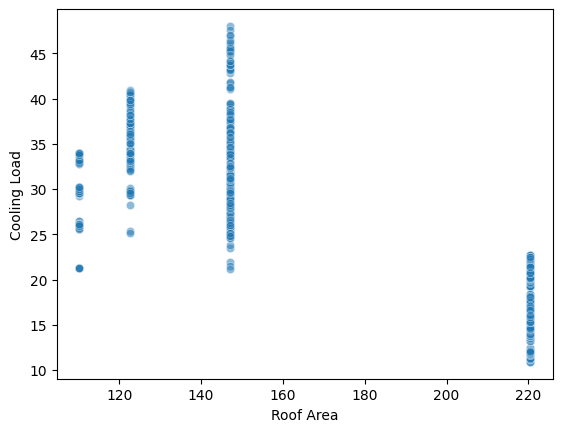

In [82]:
sns.scatterplot(x = 'Roof Area', y = "Cooling Load",data = data,alpha = 0.5);

## Spliting the data

In [83]:
feature = ["Relative Compactness","Surface","Wall Area", "Roof Area",'Ovr_height',"Orientation","Glazing Area","Glazing Area Dist"]
X = data[feature]
y = data['Cooling Load']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 4)

### Training the model with multivariable regression using Scikit Learn

## Training the Model with multivariable regression using Scikit Learn

In this section, we create the model and feed the training data to it. This model will tell us which input has the biggest impact in the output. As the plots suggested, we find that the most important coefficient is ..., followed by the ... . ... does not seem to be an important factor to ...

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [87]:
lr.score(X_test,y_test)

0.8936325473070896

In [88]:
intercept_df = pd.DataFrame([lr.intercept_], columns=['Coefficient'])
intercept_df.index = ['Intercept'] 
coefficients_df = pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficient'])
result_df = pd.concat([intercept_df, coefficients_df])
print(result_df)

                       Coefficient
Intercept             9.714886e+01
Relative Compactness -7.163771e+01
Surface               5.433116e+11
Wall Area            -5.433116e+11
Roof Area            -1.086623e+12
Ovr_height            4.400780e+00
Orientation           1.288573e-01
Glazing Area          1.483608e+01
Glazing Area Dist     1.189966e-01


## Training the model with multivariable regression using OLS

Allows us to get more details about the model

In [89]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling Load   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     672.2
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          7.95e-281
Time:                        09:38:55   Log-Likelihood:                -1592.8
No. Observations:                 614   AIC:                             3202.
Df Residuals:                     606   BIC:                             3237.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   96.7684 

### Predict the test data

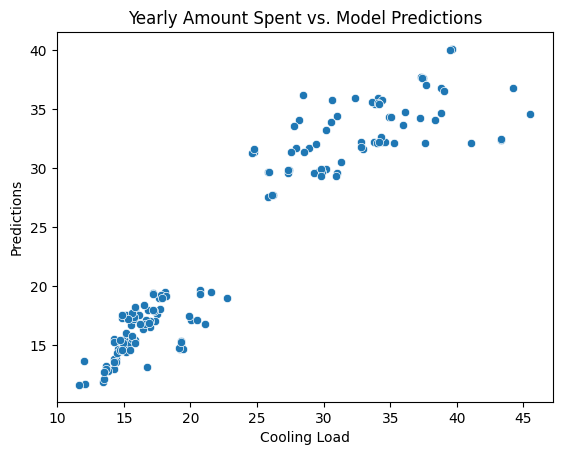

In [90]:
predictions = lr.predict(X_test)
sns.scatterplot(x = y_test, y = predictions)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions');

### Evaluation of the model

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2.0731513819336564
Mean Squared Error: 8.899480735756981
Root Mean Squared Error: 2.983199747880953


### Residuals
Distribution plot of the residuals of the model's predictions. They should be normally distributed.

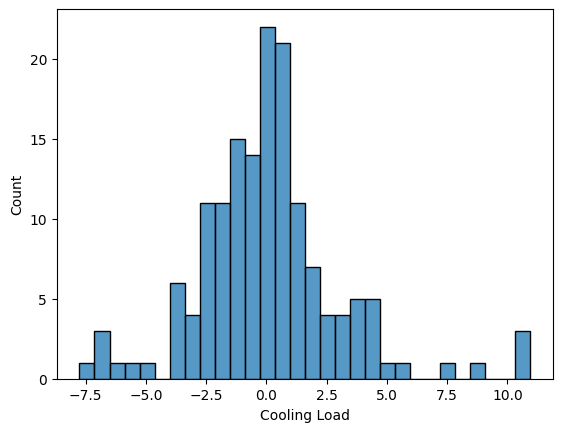

In [92]:
residuals = y_test-predictions
sns.histplot(residuals, bins=30);

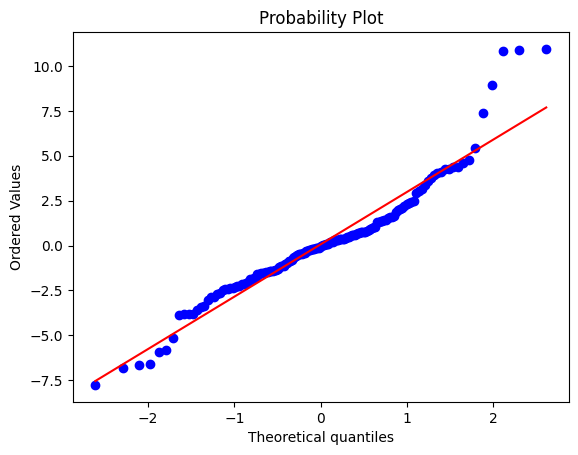

In [93]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

### Conclusion